In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
dataset = pd.read_csv(r'C:\Users\admin\Desktop\covid-19-main\data\Countiresdataset.csv')
dataset.head()

,Date,Country,Confirmed,Recovered,Deaths
0,22-03-2020,Afghanistan,78,21,11
1,23-03-2020,India,40,1,1
2,24-03-2020,India,42,1,1
3,25-03-2020,India,74,2,1
4,26-03-2020,USA,80,2,2


In [4]:
x,y=make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

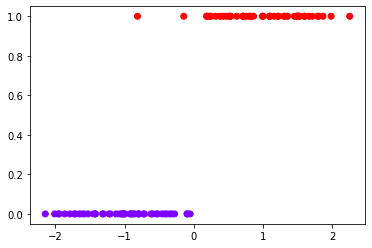

In [5]:
plt.scatter(x,y,c=y,cmap='rainbow')

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [7]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [8]:
print(log_reg.coef_)

[[2.90313443]]


In [9]:
print(log_reg.intercept_)

[0.0524103]


In [10]:
yPred=log_reg.predict(x_test)

In [11]:
confusion_matrix(y_test,yPred)

array([[12,  0],
       [ 1, 12]], dtype=int64)

In [12]:
log_reg.predict_proba(x_test)

array([[0.9705465 , 0.0294535 ],
       [0.996918  , 0.003082  ],
       [0.98939348, 0.01060652],
       [0.35813987, 0.64186013],
       [0.94634345, 0.05365655],
       [0.92973315, 0.07026685],
       [0.96086325, 0.03913675],
       [0.59143817, 0.40856183],
       [0.00530922, 0.99469078],
       [0.05110466, 0.94889534],
       [0.01188396, 0.98811604],
       [0.00301136, 0.99698864],
       [0.08621042, 0.91378958],
       [0.0722876 , 0.9277124 ],
       [0.96915567, 0.03084433],
       [0.1076925 , 0.8923075 ],
       [0.88203407, 0.11796593],
       [0.24032291, 0.75967709],
       [0.0092157 , 0.9907843 ],
       [0.17828154, 0.82171846],
       [0.99626947, 0.00373053],
       [0.01253427, 0.98746573],
       [0.99143147, 0.00856853],
       [0.72256438, 0.27743562],
       [0.85157821, 0.14842179]])

In [13]:
Linear_model=LinearRegression()
Linear_model.fit(x_train,y_train)

LinearRegression()

In [14]:
print(Linear_model.coef_)

[0.37329678]


In [15]:
intercept=Linear_model.intercept_
intercept

0.4985795446826205

In [16]:
y_pred=Linear_model.predict(x_test)
pred=pd.DataFrame(x_test)
pred['Confirmed']=y_test
pred['predConfirmed']=y_pred
pred

,0,Confirmed,predConfirmed
0,-1.221940,0,0.042433
1,-2.008690,0,-0.251258
2,-1.580372,0,-0.091368
3,0.182918,1,0.566862
4,-1.006640,0,0.122804
5,-0.907642,0,0.159760
6,-1.120575,0,0.080272
7,-0.145472,1,0.444275
8,1.784477,1,1.164719
9,0.988246,1,0.867489


In [1]:
import os
os.environ['SPARK_HOME']=r'C:\Users\admin\AppData\Local\Programs\Python\Python39\Scripts\spark-3.2.1-bin-hadoop2.7'

In [2]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BIGDATAPROJECT').getOrCreate()
data = spark.read.csv('dataset.csv',inferSchema=True,header=True)

In [ ]:
data.printSchema()

In [ ]:
data.columns

In [ ]:
my_cols = data.select([
 'Country',
 'Confirmed',
 'Recovered',
 'Deaths',])
my_final_data = my_cols.na.drop()